# Employee Attrition Analysis and Prediction

### 1. UNDERSTANDING THE GIVEN TASK

# 2. DATA COLLECTION AND UNDERSTANDING

1.I used the Dataset of **Acme Corporation has** provided historical data on employee demographics, 
job satisfaction, work environment, performance metrics, and turnover status. This dataset spans 
the **last five years** and includes information on employees who have left the company and those who are still currently employed.

2.As per the Task given i choose **classification problem** to predict Employee Attrition Rate

# 3. DATA EXPLORATION

In this step, we will apply Exploratory Data Analysis (EDA) to extract insights from the data set 
to know which features have contributed more in predicting HR Attrition Rate by performing Data Analysis
using Pandas and Data visualization using Matplotlib & Seaborn. It is always a good practice to 
understand the data first and try to gather as many insights from it.


Below are tasks to be performed in EDA:

**1. Importing Libraries**

**2. Storing the data into MongoDB Database**

**3. Loading (Fetching) data from MongoDB Database**

**4. Data Cleaning for EDA Report**

**5. Exploratory Data Analysis (EDA) on all Features**

# 3.1 Import Libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [65]:
data = pd.read_csv(r"C:\Users\MD Shahbaz\OneDrive\Desktop\Technocolabs\Acme_Project\HR-Employee-Attrition.csv")

In [66]:
# Here we are making the data into full screen means all the column should get visibel
# this is only for checking all the columns thats it orignal data in data variable
df= data.style.set_properties(**{'max-width': '500px', 'font-size': '12pt'}).set_table_styles([{
    'selector': 'tr:hover',
    'props': [('background-color', 'yellow')]
}])

In [67]:
df

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Looks like all the datatype is already been setetup may be we dont have to change the datatype

In [69]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There is no null value we can over here data is clean 

In [70]:
# No duplicated data is there 
data[data.duplicated()]

Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

[0 rows x 35 columns]

In [71]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [72]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [73]:
data.describe(include="all").T

## if we see here the Employee_Count column is having the std =0 and unique value is only 1 remove

count unique                     top  freq  \
Age                       1470.0    NaN                     NaN   NaN   
Attrition                   1470      2                      No  1233   
BusinessTravel              1470      3           Travel_Rarely  1043   
DailyRate                 1470.0    NaN                     NaN   NaN   
Department                  1470      3  Research & Development   961   
DistanceFromHome          1470.0    NaN                     NaN   NaN   
Education                 1470.0    NaN                     NaN   NaN   
EducationField              1470      6           Life Sciences   606   
EmployeeCount             1470.0    NaN                     NaN   NaN   
EmployeeNumber            1470.0    NaN                     NaN   NaN   
EnvironmentSatisfaction   1470.0    NaN                     NaN   NaN   
Gender                      1470      2                    Male   882   
HourlyRate                1470.0    NaN                     NaN   NaN   
JobInvolvement            1470.0    NaN                     NaN   NaN   
JobLevel                  1470.0    NaN                     NaN   NaN   
JobRole                     1470      9         Sales Executive   326   
JobSatisfaction           1470.0    NaN                     NaN   NaN   
MaritalStatus               1470      3                 Married   673   
MonthlyIncome             1470.0    NaN                     NaN   NaN   
MonthlyRate               1470.0    NaN                     NaN   NaN   
NumCompaniesWorked        1470.0    NaN                     NaN   NaN   
Over18                      1470      1                       Y  1470   
OverTime                    1470      2                      No  1054   
PercentSalaryHike         1470.0    NaN                     NaN   NaN   
PerformanceRating         1470.0    NaN                     NaN   NaN   
RelationshipSatisfaction  1470.0    NaN                     NaN   NaN   
StandardHours             1470.0    NaN                     NaN   NaN   
StockOptionLevel          1470.0    NaN                     NaN   NaN   
TotalWorkingYears         1470.0    NaN                     NaN   NaN   
TrainingTimesLastYear     1470.0    NaN                     NaN   NaN   
WorkLifeBalance           1470.0    NaN                     NaN   NaN   
YearsAtCompany            1470.0    NaN                     NaN   NaN   
YearsInCurrentRole        1470.0    NaN                     NaN   NaN   
YearsSinceLastPromotion   1470.0    NaN                     NaN   NaN   
YearsWithCurrManager      1470.0    NaN                     NaN   NaN   

                                  mean          std     min     25%      50%  \
Age                           36.92381     9.135373    18.0    30.0     36.0   
Attrition                          NaN          NaN     NaN     NaN      NaN   
BusinessTravel                     NaN          NaN     NaN     NaN      NaN   
DailyRate                   802.485714     403.5091   102.0   465.0    802.0   
Department                         NaN          NaN     NaN     NaN      NaN   
DistanceFromHome              9.192517     8.106864     1.0     2.0      7.0   
Education                     2.912925     1.024165     1.0     2.0      3.0   
EducationField                     NaN          NaN     NaN     NaN      NaN   
EmployeeCount                      1.0          0.0     1.0     1.0      1.0   
EmployeeNumber             1024.865306   602.024335     1.0  491.25   1020.5   
EnvironmentSatisfaction       2.721769     1.093082     1.0     2.0      3.0   
Gender                             NaN          NaN     NaN     NaN      NaN   
HourlyRate                   65.891156    20.329428    30.0    48.0     66.0   
JobInvolvement                2.729932     0.711561     1.0     2.0      3.0   
JobLevel                      2.063946      1.10694     1.0     1.0      2.0   
JobRole                            NaN          NaN     NaN     NaN      NaN   
JobSatisfaction               2.728571

##### Over18 and Employee_Count are the two column there only two values are ther better remove

# 3.2 Data Cleaning in target variable

In [74]:
data["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

#### The data provided to us is very cleaned data we dont have export the data for BI Viusalization.

# 3.3 Exploratory Data Analysis (EDA)¶

#### Analysis on to the Categoricxal columns W.R.T Target Column 

<AxesSubplot: xlabel='Attrition', ylabel='count'>

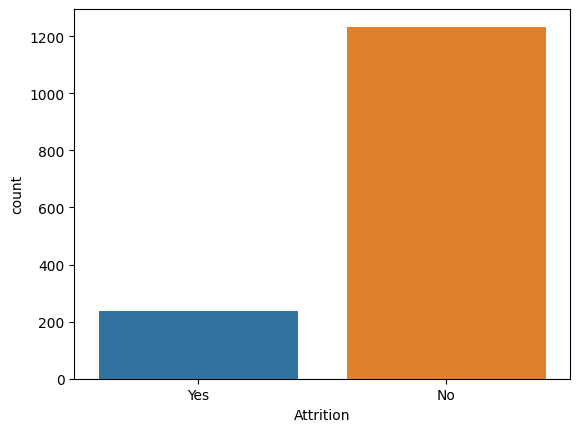

In [75]:
sns.countplot(x=data["Attrition"])

###### By seeing this we can say this is imbalance data becoz there is huge diffrence

##### How Business Travel is Effecting on the Attrition 

<AxesSubplot: xlabel='BusinessTravel', ylabel='count'>

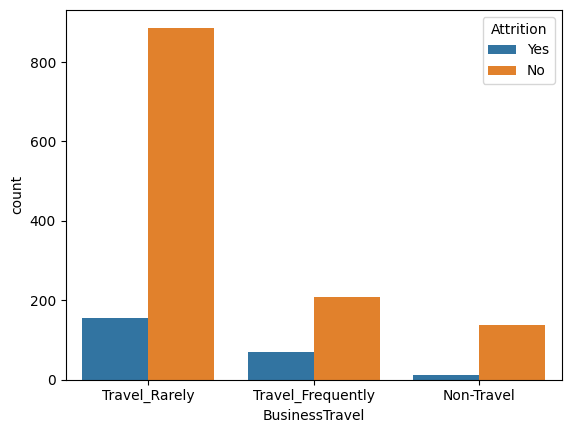

In [76]:
sns.countplot(x=data["BusinessTravel"],hue=data["Attrition"])

##### How Business Department is Effecting on the Attrition 

<AxesSubplot: xlabel='Department', ylabel='count'>

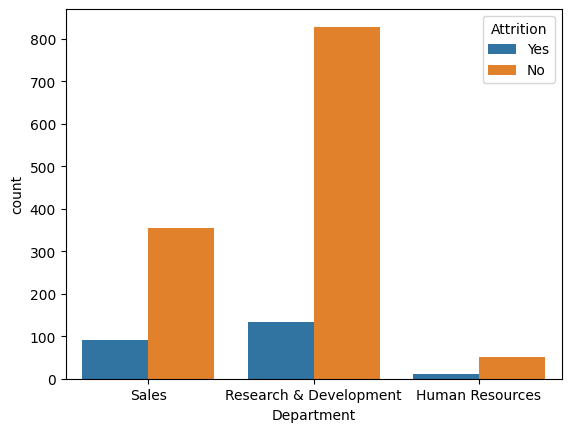

In [77]:
sns.countplot(x=data["Department"],hue=data["Attrition"])

##### How Business Department is Effecting on the Attrition 

<AxesSubplot: xlabel='Attrition', ylabel='count'>

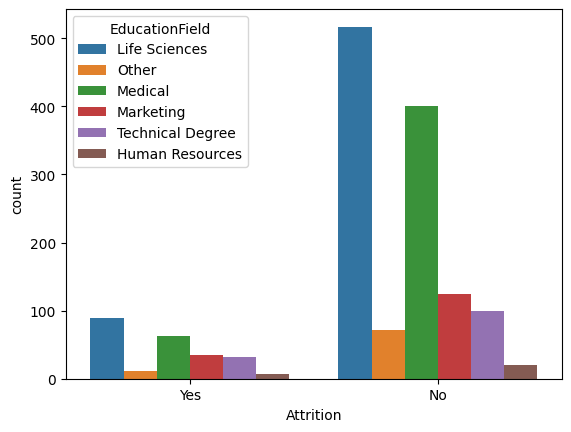

In [78]:
sns.countplot(x=data["Attrition"] , hue=data["EducationField"])

### Gender and Attrition Impact

<AxesSubplot: xlabel='Attrition', ylabel='count'>

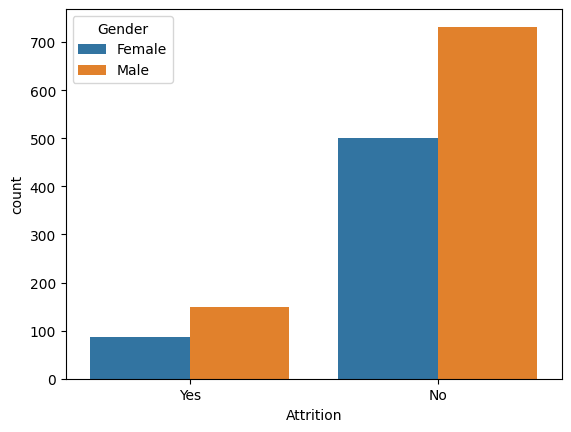

In [79]:
sns.countplot(x=data["Attrition"],hue=data["Gender"])

### OverTime Attrition Impact

<AxesSubplot: xlabel='Attrition', ylabel='count'>

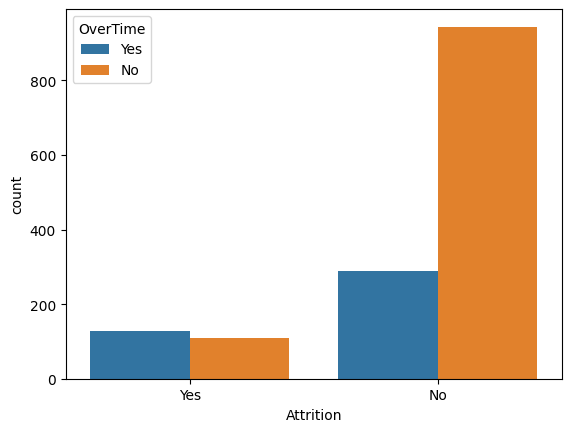

In [80]:
sns.countplot(x=data["Attrition"],hue=data["OverTime"])

### Impact of Job Role on Attrition

<AxesSubplot: xlabel='JobRole', ylabel='count'>

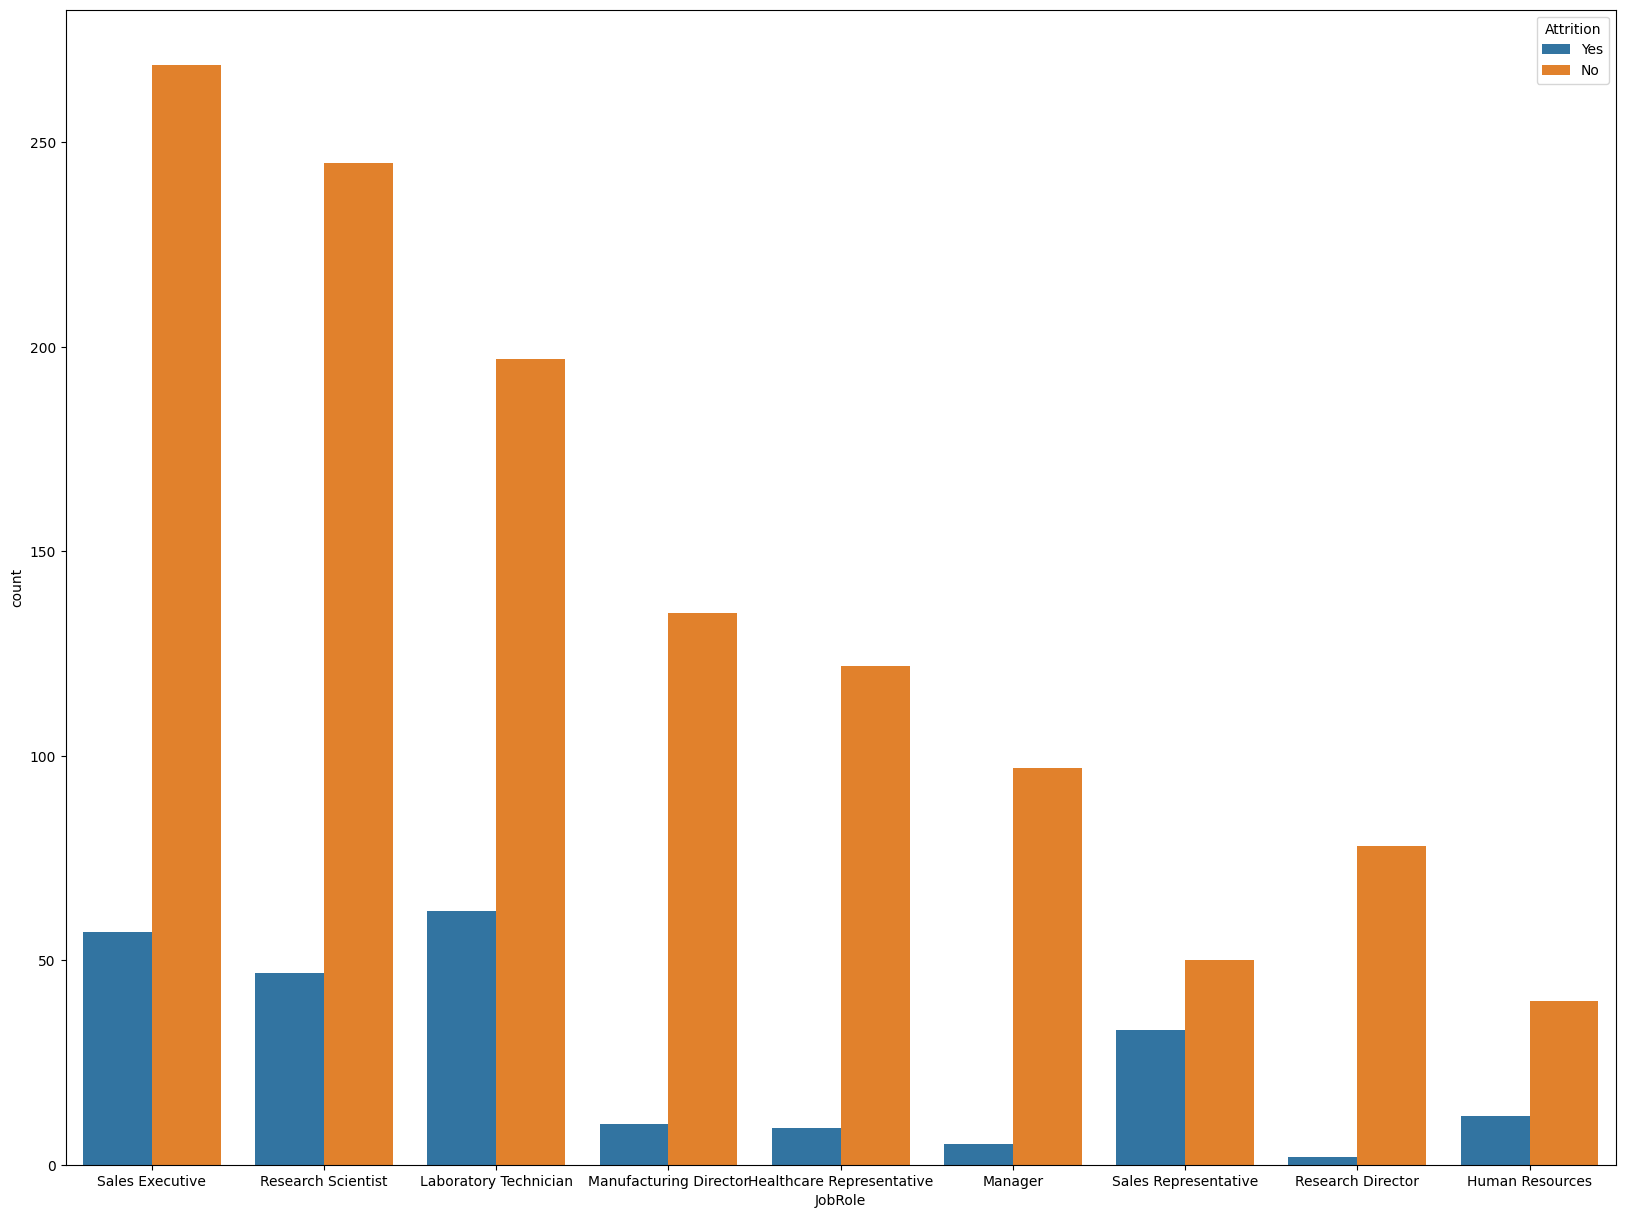

In [81]:
plt.figure(figsize=(20,15))
sns.countplot(x=data["JobRole"],hue=data["Attrition"])

## -Analysis on numerical column W.R.T the Attrition OR Target Column

In [82]:
numerical_column=[]
for i in data.columns:
    if data[i].dtype =="int64" and len(data[i].unique())>=10 :
        numerical_column.append(i)

In [83]:
data2=numerical_column

In [84]:
data2=data[['Age',
 'DailyRate',
 'DistanceFromHome',
 'EmployeeNumber',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']]

#### at single loop we can draw the analysis here on continous data

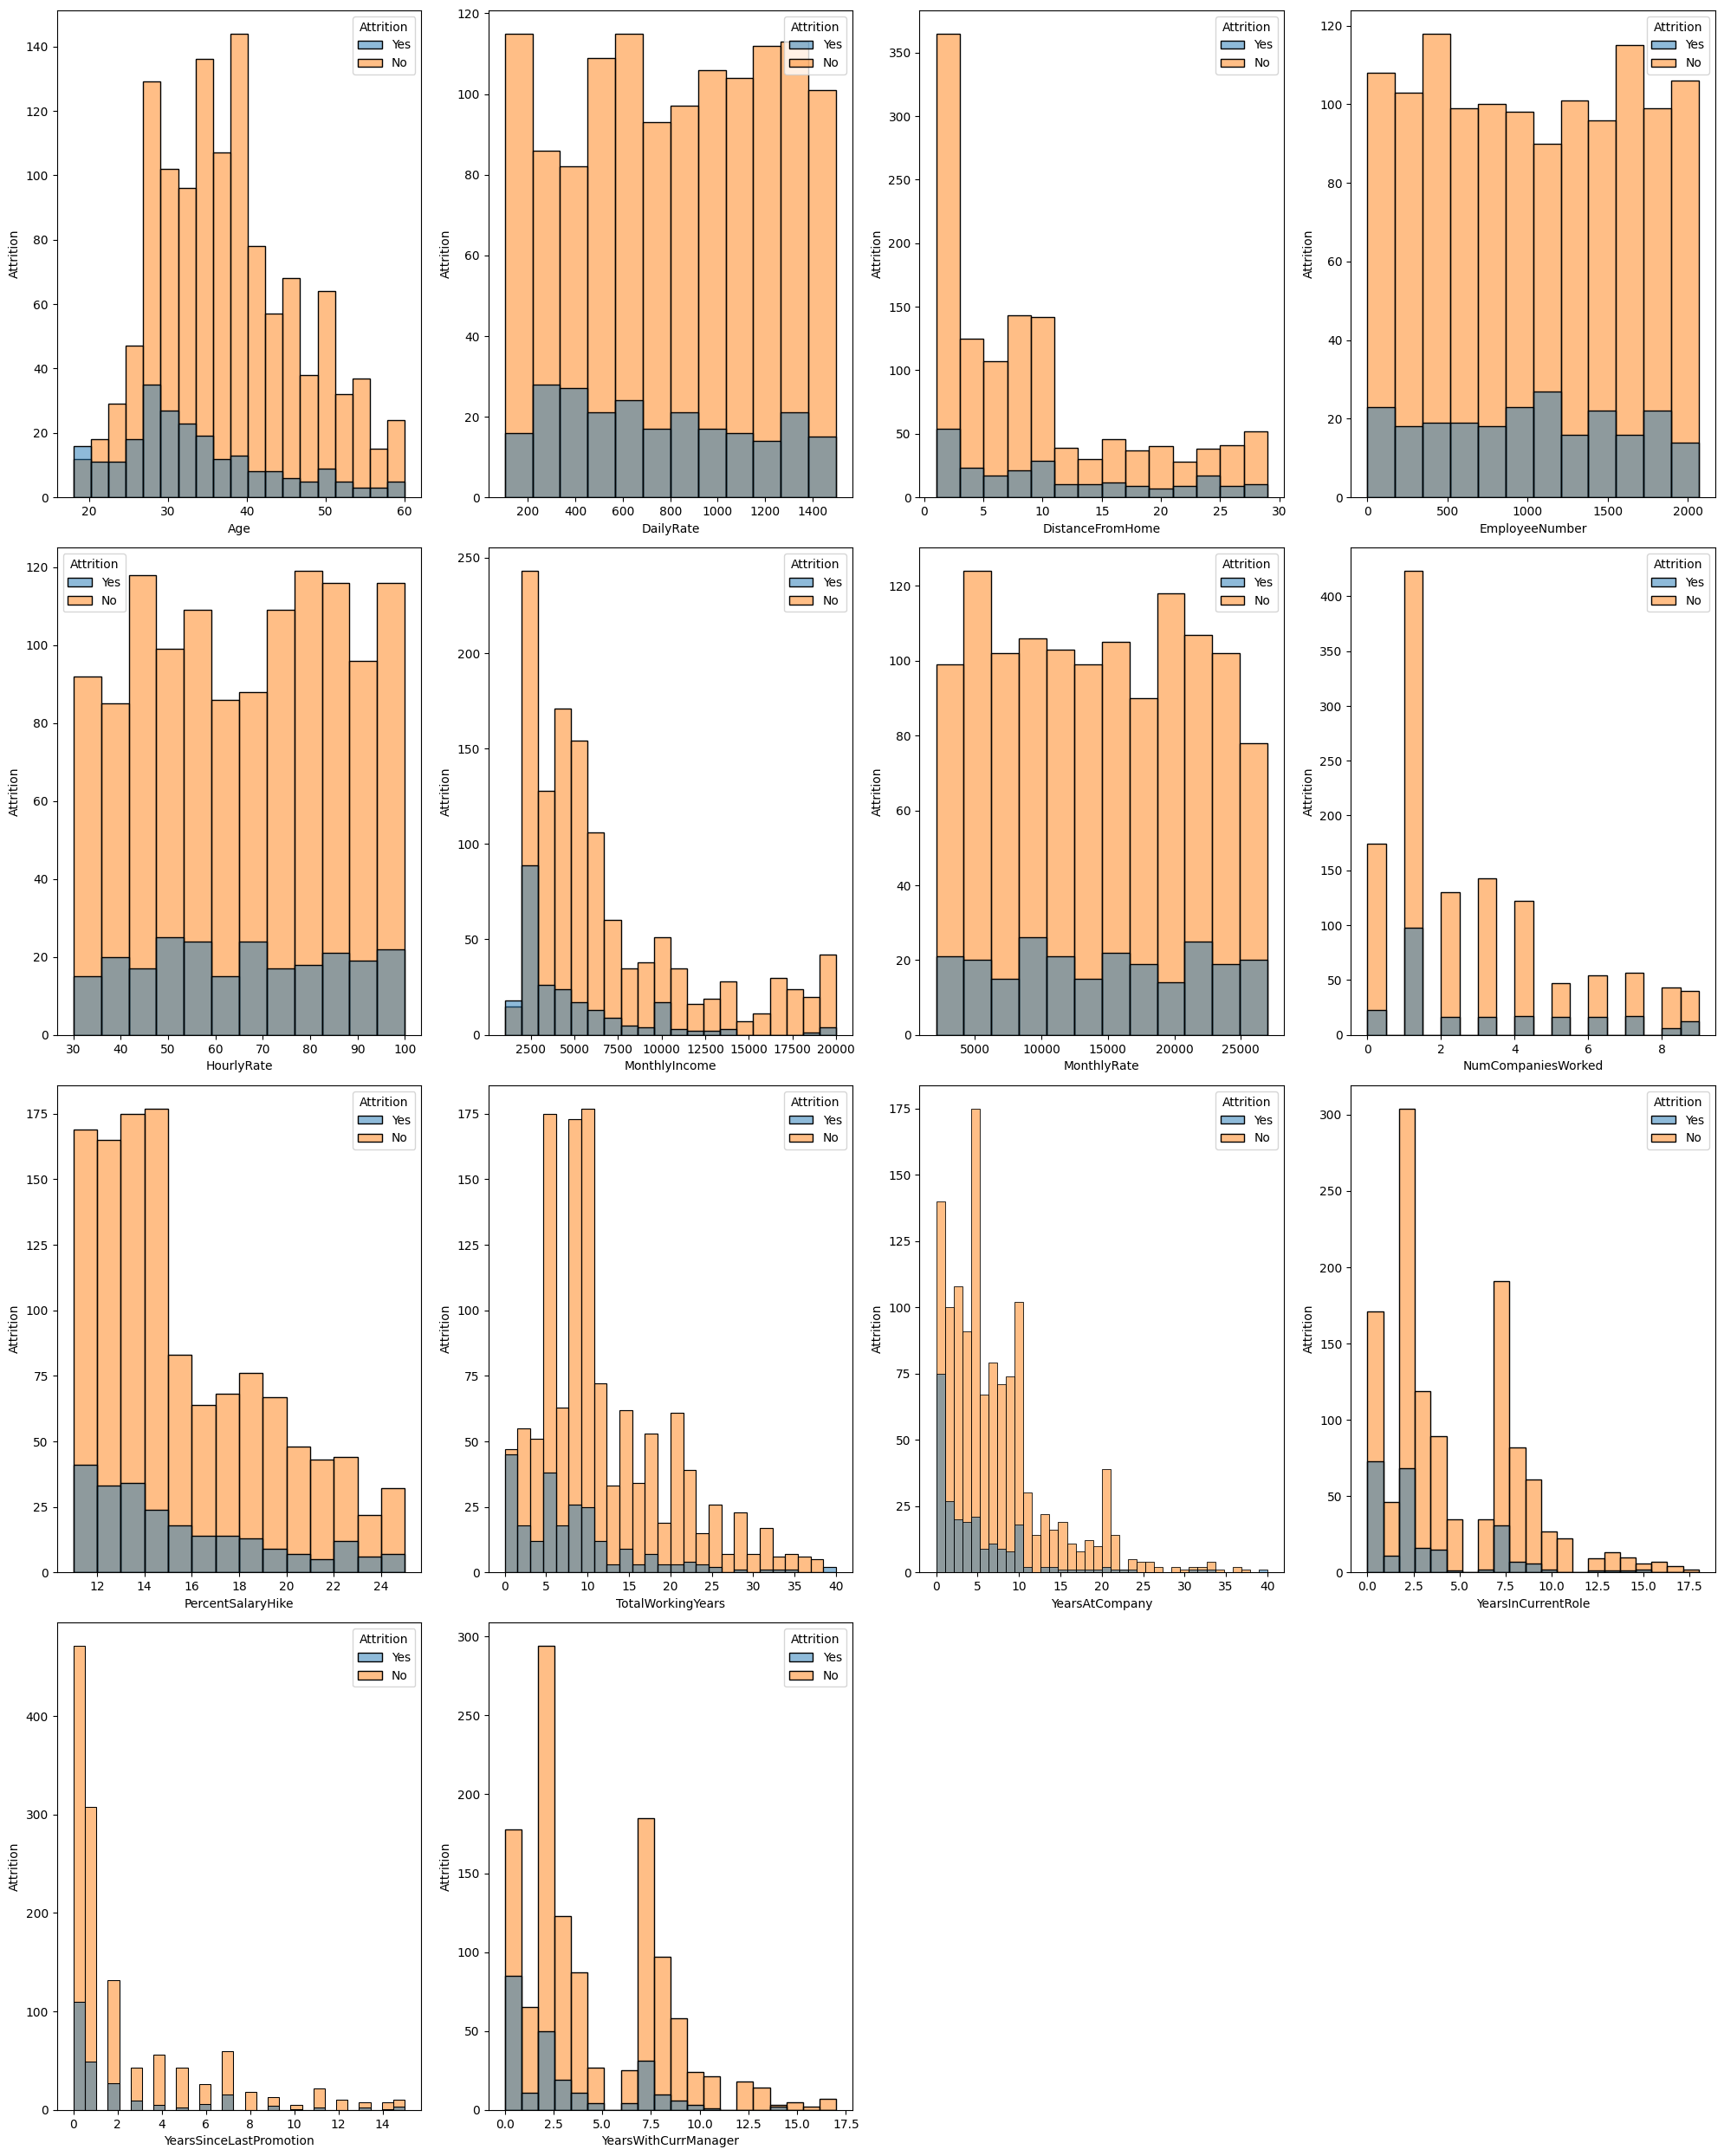

In [85]:
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1
for i in data2:
    if plotnumber<16:
        ax=plt.subplot(4,4,plotnumber)
        sns.histplot(x=data2[i].dropna(axis=0),hue=data["Attrition"])
        plt.xlabel(i)
        plt.ylabel("Attrition")
        
    plotnumber+=1
plt.tight_layout()

### Impact of Age on Attrition 

<AxesSubplot: xlabel='Age', ylabel='Count'>

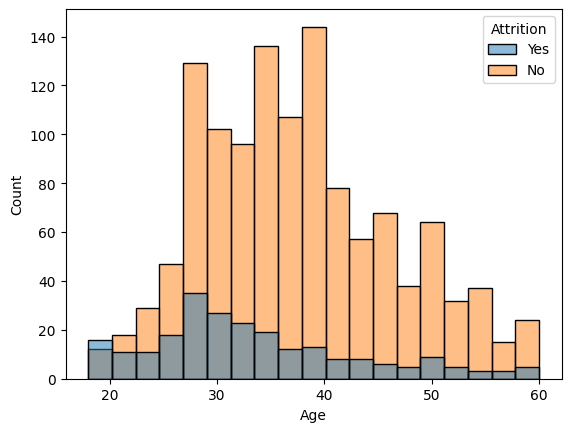

In [86]:
sns.histplot(x=data["Age"],hue=data["Attrition"])

### DistanceFromHome impact on attrition

<AxesSubplot: xlabel='DistanceFromHome', ylabel='Count'>

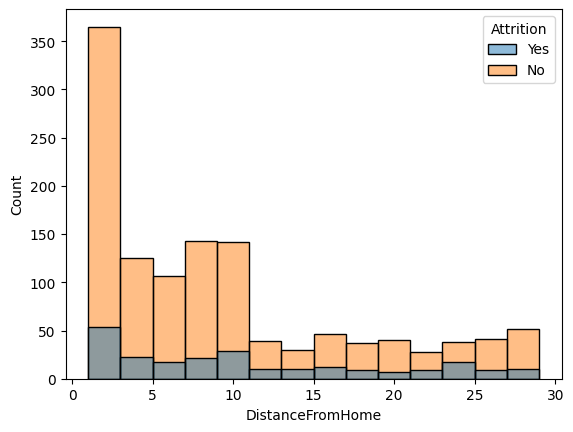

In [87]:
sns.histplot(x=data["DistanceFromHome"],hue=data["Attrition"])

### How monthly income can impact on the Attrition Rate

<AxesSubplot: xlabel='MonthlyIncome', ylabel='Count'>

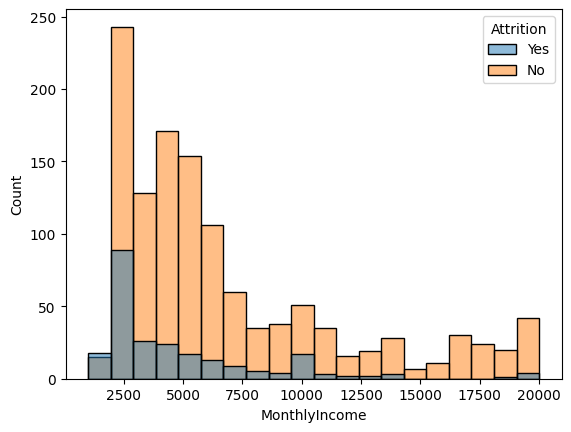

In [88]:
sns.histplot(x=data["MonthlyIncome"],hue=data["Attrition"])

### impact of No of Comapny he worked

<AxesSubplot: xlabel='NumCompaniesWorked', ylabel='Count'>

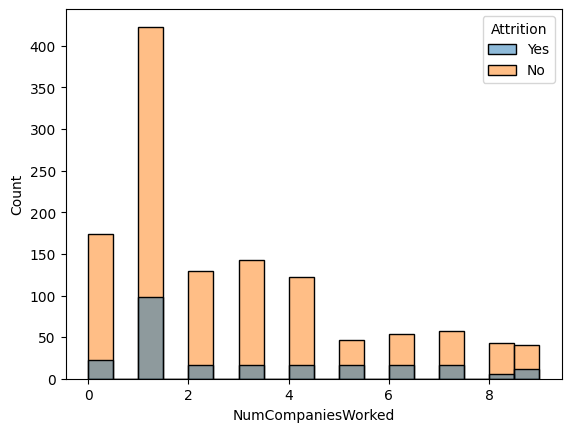

In [89]:
sns.histplot(x=data["NumCompaniesWorked"],hue=data["Attrition"])

### How salary hike is impacting on Attrition Rate

<AxesSubplot: xlabel='PercentSalaryHike', ylabel='Count'>

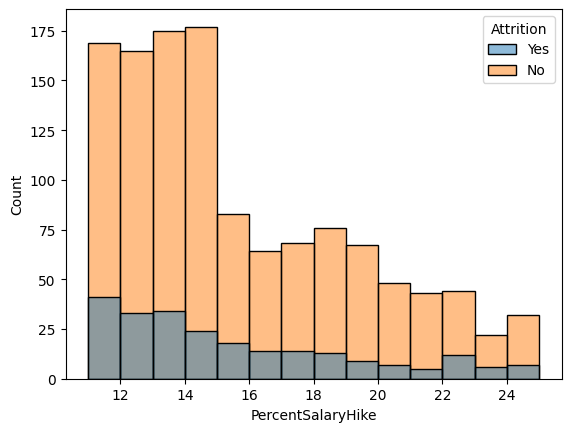

In [90]:
sns.histplot(x=data["PercentSalaryHike"],hue=data["Attrition"])

# Years at the company he workign

<AxesSubplot: xlabel='TotalWorkingYears', ylabel='Count'>

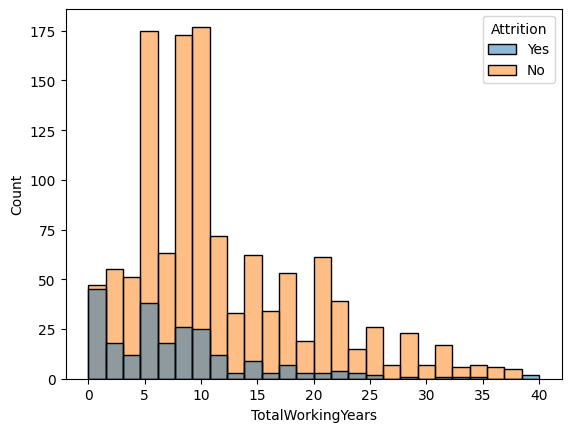

In [91]:
sns.histplot(x=data["TotalWorkingYears"],hue=data["Attrition"])

## Analysis of discrete the data W.R.T Target column

In [92]:
discrete_column=[]
for i in data.columns:
    if data[i].dtype =="int64" and len(data[i].unique())<=10 :
        discrete_column.append(i)

In [93]:
data3=data[['Education',
 'EmployeeCount',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'NumCompaniesWorked',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance']]

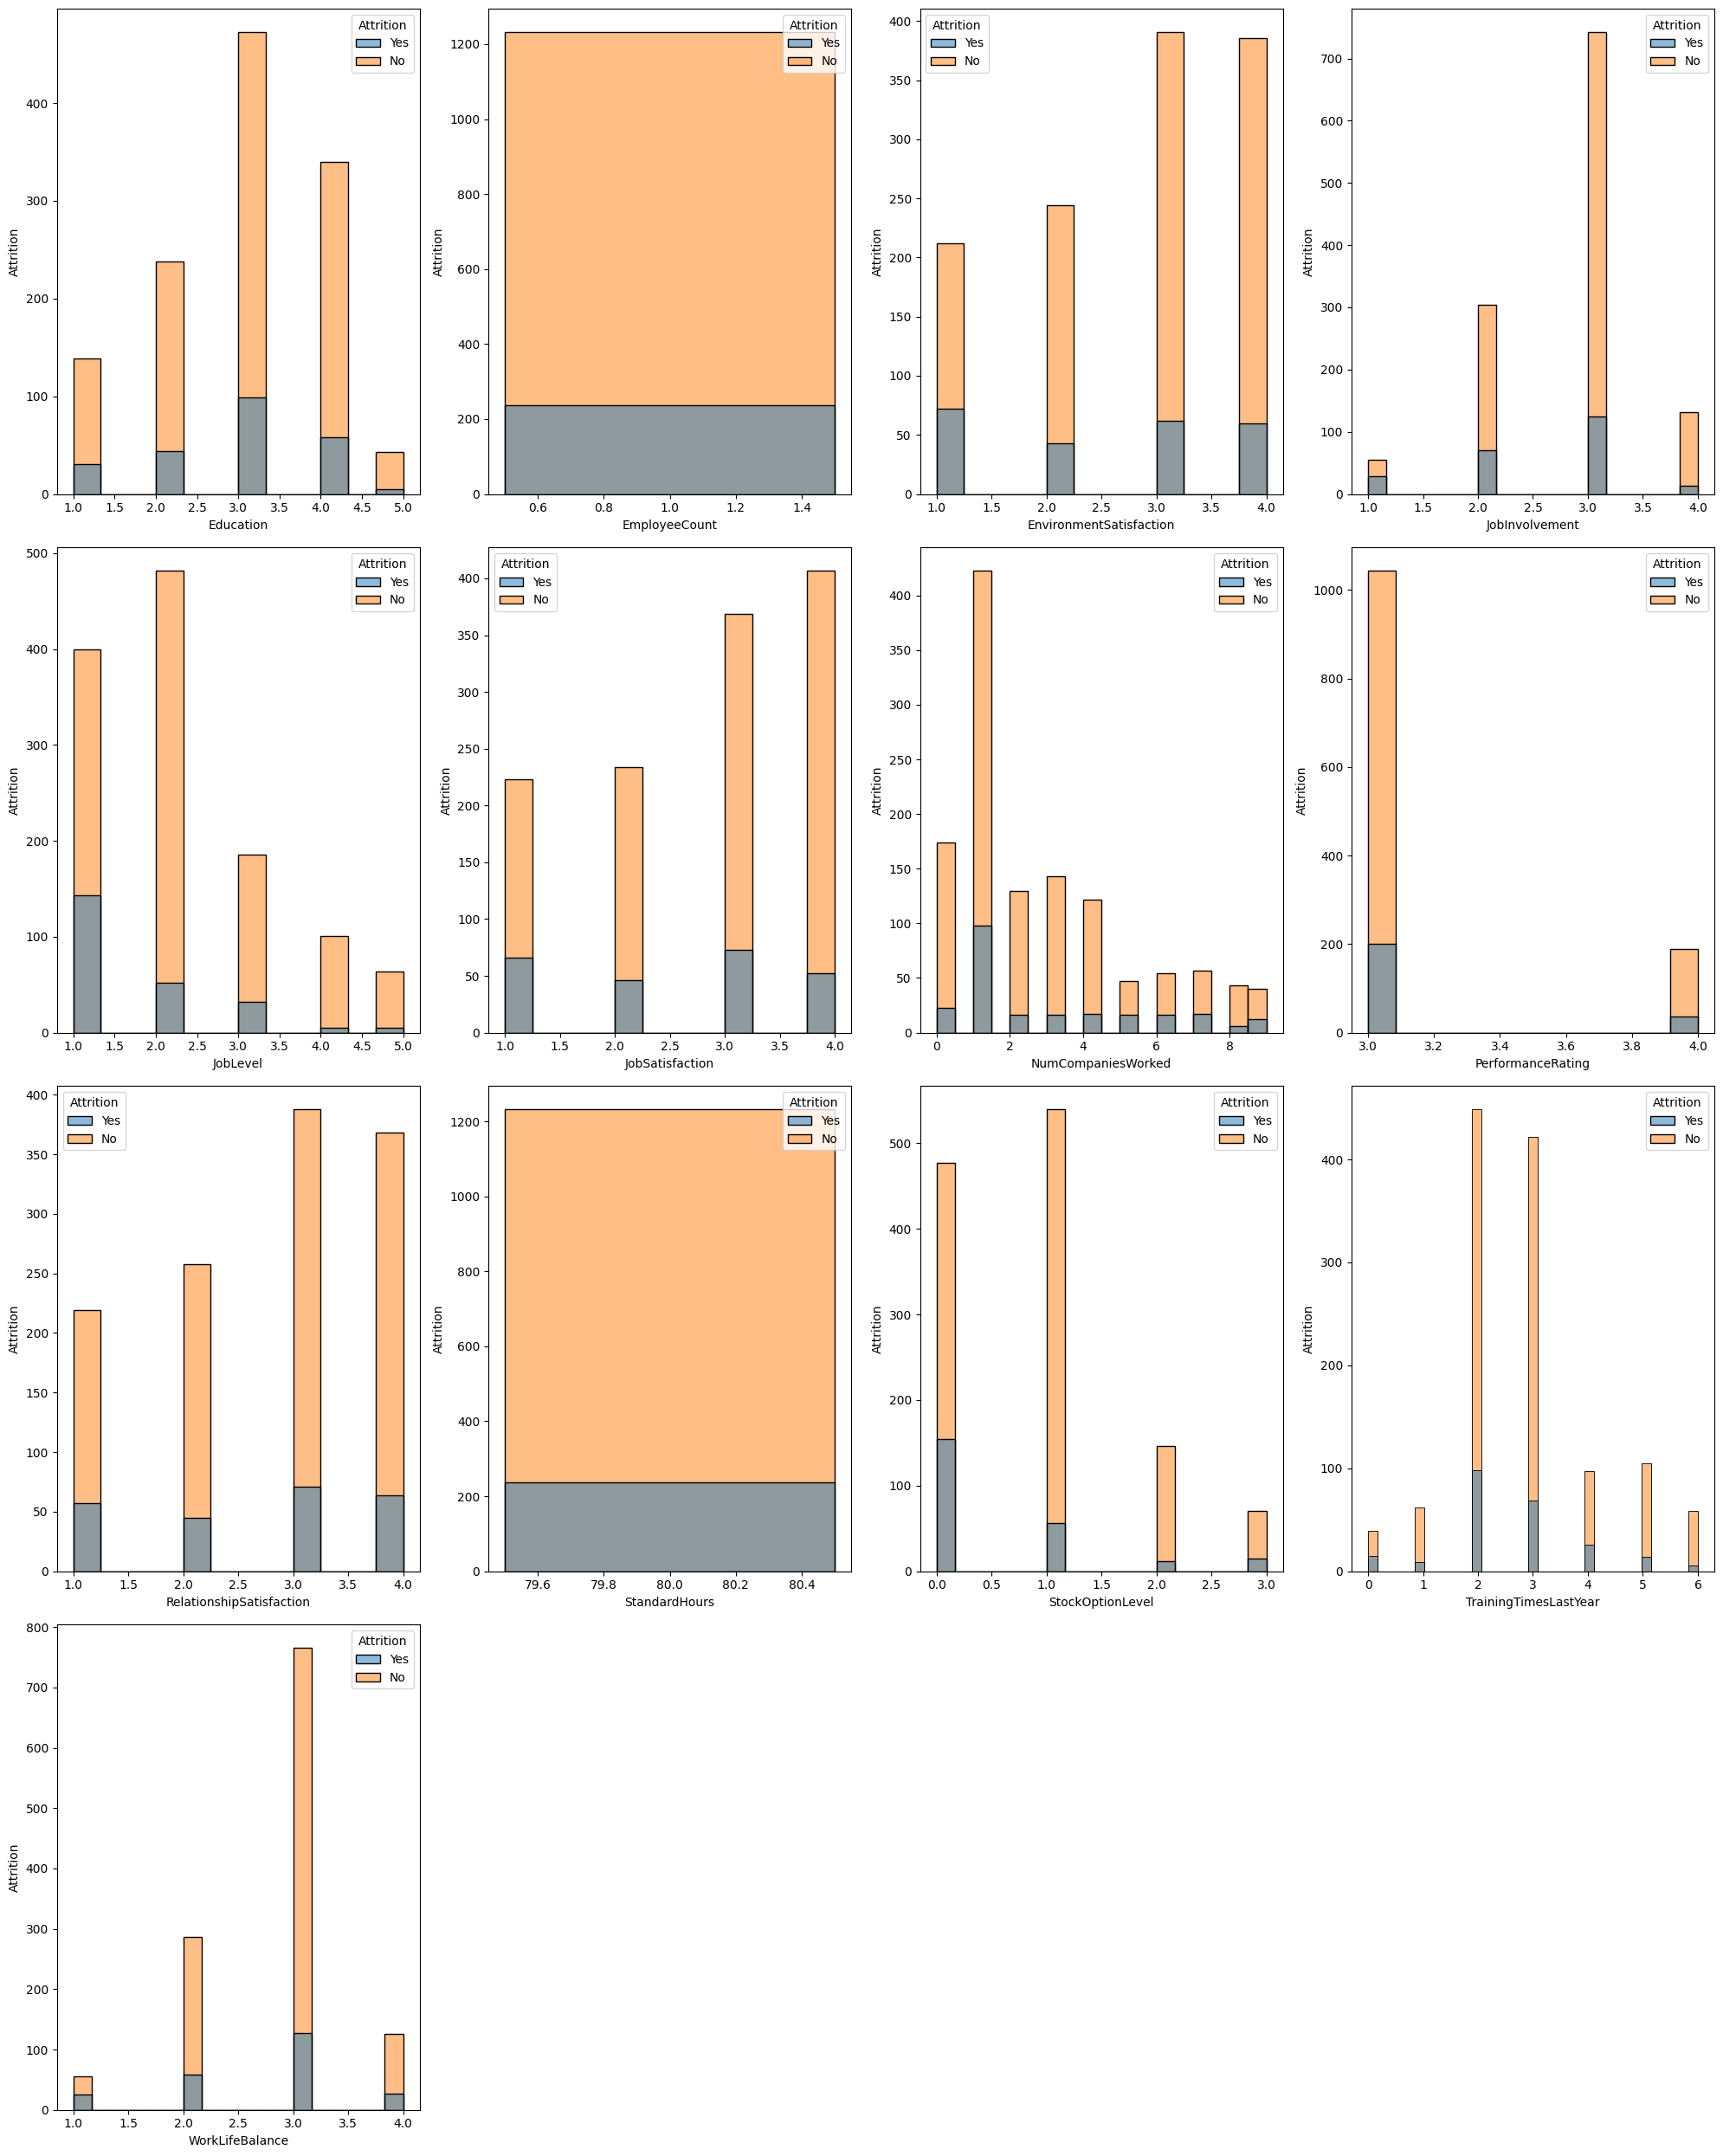

In [94]:
## at once olny we can make all comparison here easily 
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1
for i in data3:
    if plotnumber<16:
        ax=plt.subplot(4,4,plotnumber)
        sns.histplot(x=data3[i].dropna(axis=0),hue=data["Attrition"])
        plt.xlabel(i)
        plt.ylabel("Attrition")
        
    plotnumber+=1
plt.tight_layout()

### Impact of Environmental Job Satisfaction

<AxesSubplot: xlabel='EnvironmentSatisfaction', ylabel='count'>

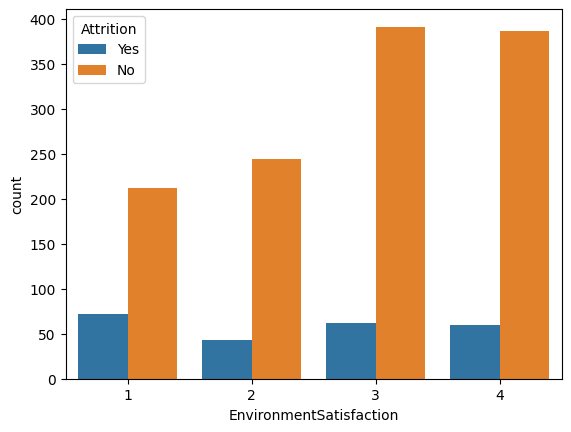

In [98]:
sns.countplot(x=data["EnvironmentSatisfaction"] , hue=data["Attrition"])

### Job Involment Impacting on attrition

<AxesSubplot: xlabel='JobLevel', ylabel='count'>

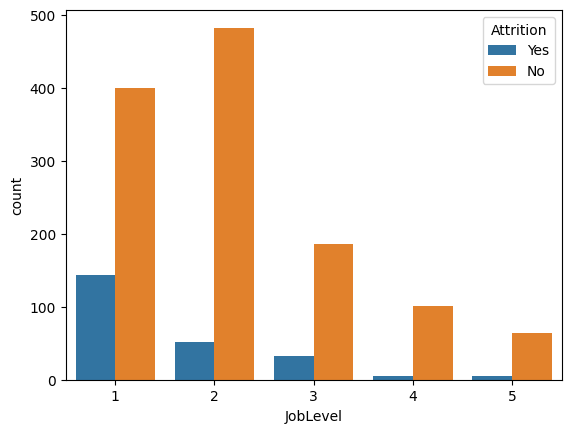

In [101]:
sns.countplot(x=data["JobLevel"],hue=data["Attrition"])

# Why the data Analysis is important what is its Advantages

#### This is tell at once single you can easily be compare the all the column W.R.T Target

In [114]:
## This is best code for @ once only you can comapre the all analysis like Impact all other feature
## with respect to the Target feature

c=widgets.Dropdown(
    options=data.columns,
    value='Age',
    description='Number:',
    disabled=False,
)

def graph(k):
    plt.figure(figsize=(20,20))
    sns.countplot(x=k, hue="Attrition" , data=data)

In [115]:
widgets.interact(graph,k=c)

interactive(children=(Dropdown(description='Number:', options=('Age', 'Attrition', 'BusinessTravel', 'DailyRat…

<function __main__.graph(k)>

### Conclution::

**"After conducting thorough exploratory data analysis (EDA), it is evident that certain columns 
exhibit significant importance, shedding light on key insights that can inform further analysis 
and decision-making processes."**